<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%82%AC%EC%9A%A9%EC%9E%90_%EC%A0%95%EC%9D%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

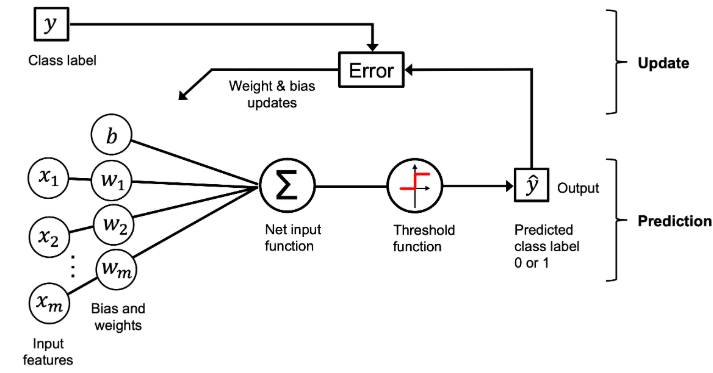

# 퍼셉트
```
가장 기본적인 인공신경망 - 이진분류기
1. 입력과 가중치의 선형 결합
2. 그 결과에 계단함수를 적용
3. 예측값과 실제값의 차이를 바탕으로 가중치와 바이어스를 조정
```
$$z = \sum_{i=1}^{n} w_i x_i + b
$$
```
계단함수
```
$$\hat{y} = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{otherwise}
\end{cases}
$$
```
가중치 업데이트
```
$$w_i \leftarrow w_i + \eta (y - \hat{y}) x_i$$
$$b \leftarrow b + \eta (y - \hat{y})
$$


In [ ]:
import numpy as np
rgen =  np.random.RandomState(42)
w = rgen.normal(loc=0.0, scale=0.01, size=10)  # 정규분포의 평균, 정규분포의 표준편차
b = np.float64(0.)
w,b

(array([ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
        -0.00234137,  0.01579213,  0.00767435, -0.00469474,  0.0054256 ]),
 np.float64(0.0))

In [ ]:
class Perceptron:
  def __init__(self, eta=0.01, n_iter=10,random_state = 1):
      self.eta = eta  # 학습율
      self.n_iter = n_iter
      self.random_state = random_state
  def fit(self, X, y):
    # 가중치와 바이어스는 랜덤한 값
    rgen =  np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # 정규분포의 평균, 정규분포의 표준편차
    self.b_ = np.float64(0.)
    self.errors_ = []
    # 학습횟수 만큼 순환
    for _ in range(self.n_iter):  # 에포크
      errors = 0  # 오류의 개수
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)  # 예측이 잘못 분류했을경우
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def predict(self, X):  # 계단함수를 통과한 예측값
    return np.where(self.net_input(X) >= 0.0, 1, 0)

데이터 읽기
```
붓꽃 데이터셋
```

In [ ]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target

In [ ]:
X[:3], y[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([0, 0, 0]))

시각화
```
X[:,2] X[:,3] 품종별로 scatter
```

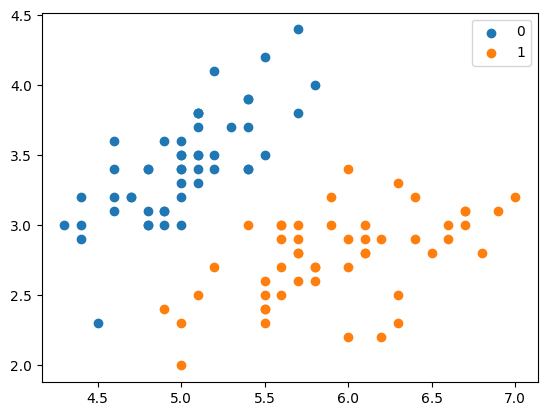

In [ ]:
import matplotlib.pyplot as plt
X_0 = X[y == 0]
X_1 = X[y == 1]
plt.scatter(X_0[:,0],X_0[:,1],label = 0)
plt.scatter(X_1[:,0],X_1[:,1],label = 1)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = np.stack(( X_0, X_1)).reshape(-1,4)
y = np.array([0]*len(X_0) + [1]*len(X_1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

퍼셉트론 적용하기

In [ ]:
pc = Perceptron()
pc.fit(X_train,y_train)

In [ ]:
pc.errors_

[9, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
pc.predict(X_test), y_test

(array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]))

In [ ]:
pc = Perceptron()
X = load_iris().data
y = load_iris().target
X = X[(y == 0) | (y == 1)]
pc.fit(X,y)
pc.errors_

[2, 2, 1, 0, 0, 0, 0, 0, 0, 0]

# 주요 라이브러리

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# 공개 데이터셋
train_dataset =  datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_dataset =  datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
# 채널정보가 앞에 있다.
data,label = next(iter(train_dataset))
# C, H , W
data.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
# 데이터 로더
batch_size = 64
train_dataloader =  DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
data, label = next(iter(train_dataloader))
# 64 1 28 28  N,C,H,W
data.shape, label.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
import tensorflow as tf
c100 = tf.keras.datasets.cifar100
(X_trin,_),(_,_) = c100.load_data()
X_trin.shape

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

# 다층퍼셉트론(MLP)
```
AND/OR 문제는 선형 결정 경계로 해결 가능 xor 선형으로 불가능
단일 퍼셉트론으로 불가
다층 퍼셉트론
은닉층
```
$$\mathbf{h} = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)
$$
```
출력층
```
$$\hat{y} = \sigma(\mathbf{W}_2 \mathbf{h} + \mathbf{b}_2)
$$


In [ ]:
import torch
import torch.nn as nn   # tensorflow의 layers와 유사
import torch.optim as optim
# 다층 퍼셉트론..(기존 모델에서 상속받아서)
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # 입력을 2개 받아서 출력을 2개로 하는 히든 레이어
    # 입력을 2개 받아서 출력을 1개로 하는 히든 레이어 -- > 출력
    self.fc1 = nn.Linear(2,2)
    self.fc2 = nn.Linear(2,1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
  # 전방계산
  def forward(self,x):
    h = self.relu(self.fc1(x))
    out = self.sigmoid(self.fc2(h))
    return out
# xor data
X = torch.tensor([
 [0. , 0.],[0. , 1.],[1. , 0.],[1. , 1.]
])
y = torch.tensor([[0.],[1.],[1.],[0.]])
# 모델 손실함수 옵티마이져
model = MLP()
criterion = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters())
# 학습루프
for epoch in range(1000):
  optimizer.zero_grad()  # 가중치 자체가 업데이트되는 걸 방지하기 위해서 초기화
  y_pred = model(X)  # 예측값  내부에서 forward 가 수행
  loss = criterion(y_pred,y)  # 손시리함수를 이용한 오차 를 계산
  loss.backward()  # 오차의 미분만큼 업데이트 하기위해서  - 오차에대한 미분값을 계산
  optimizer.step()  # 가중치 업데이트가 발생
  if epoch % 100 == 0:
    print(f"epoch {epoch} loss {loss.item()}")  # 텐서형태의 데이터를 item을 이용해서 출력

epoch 0 loss 0.7305733561515808
epoch 100 loss 0.7079633474349976
epoch 200 loss 0.6956411004066467
epoch 300 loss 0.6940253376960754
epoch 400 loss 0.693749189376831
epoch 500 loss 0.6936115622520447
epoch 600 loss 0.6935057044029236
epoch 700 loss 0.6934239864349365
epoch 800 loss 0.6933610439300537
epoch 900 loss 0.6933122277259827


예측

In [ ]:
with torch.no_grad():  # 역전파를 방지
   for i in range(4):
    pred = model(X[i])
    print(f'입력 : {X[i]} 예측 : {pred.item():.4f}')

입력 : tensor([0., 0.]) 예측 : 0.5112
입력 : tensor([0., 1.]) 예측 : 0.5037
입력 : tensor([1., 0.]) 예측 : 0.4971
입력 : tensor([1., 1.]) 예측 : 0.4896


# 토치로 데이터 로드해서 적용해 보기

모델 생성
```
선형레이어
활성홤수 렐루
선형레이어
활성화함수 렐루
선형레이어
활성화 함수 소프트맥스 : 파이토치에서는 사용안함 why
  nn.CrossEntropyLoss 내부적으로 logsoftmax, mlloss를 결합한 상태로 구현되어 있음 따라서 자동으로 softmax 연산이 포함
```

In [ ]:
batch_size = 64
train_dataset =  datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_dataset =  datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)
train_dataloader =  DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
data, label  = next(iter(train_dataloader))
data.shape

torch.Size([64, 1, 28, 28])

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
class NeuralNetwor(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear( 28*28, 512 )
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear( 512, 256 )
    self.relu2 = nn.ReLU()
    self.out = nn.Linear( 256, 10 )
  def forward(self, x):
    x = self.flatten(x)  # nn.Flatten()(x)
    x = self.relu1(self.fc1(x))
    x = self.relu2(self.fc2(x))
    return self.out(x)

model = NeuralNetwor().to(device)
print(model)

Using cpu device
NeuralNetwor(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=256, out_features=10, bias=True)
)


학습
```
손실함수
옵티마이져
```

In [ ]:
criterion = nn.CrossEntropyLoss()  # 내부에 softmax가 적용
optim = torch.optim.SGD(model.parameters(), lr=0.01)  # 가중치 업데이트

In [ ]:
def train(dataloader, model, criterion, optim):
  for idx, (X,y) in enumerate(dataloader):  # 64,1,28,28
    pred = model(X)  # 예측 predict
    loss = criterion(pred, y)  # 손실(기울기 계산)
    loss.backward()  # 기울기 적용
    optim.step() # 업데이트
    optim.zero_grad()  # 가중치 초기화
    if idx % 100 == 0:
      print(f"loss {loss.item()}")
def test(dataloader,model,criterion):
  test_loss = 0
  correct = 0
  with torch.no_grad():  # 가중치 업데이트 방지
    for X,y in dataloader:
      pred = model(X)
      test_loss += criterion(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()  #torch.float[0.25] -- 0.25
  print(f"test loss avg {test_loss / len(dataloader)} accuracy = {correct / len(dataloader.dataset)}")

In [ ]:
len(train_dataset), len(train_dataloader), len(train_dataloader.dataset)

(60000, 938, 60000)

클래스 적용하기

In [ ]:
epochs = 5
for epoch in range(epochs):
  print(f"epoch {epoch}")
  train(train_dataloader, model, criterion, optim)
  test(test_dataloader, model, criterion)

epoch 0
loss 0.6196832060813904
loss 0.5485687851905823
loss 0.4514438211917877
loss 0.5124491453170776
loss 0.4186044931411743
loss 0.3669567406177521
loss 0.480249285697937
loss 0.4023935794830322
loss 0.49657782912254333
loss 0.513981819152832
test loss avg 0.5132922249235166 accuracy = 0.8157
epoch 1
loss 0.3506842255592346
loss 0.40596526861190796
loss 0.716652512550354
loss 0.3863941729068756
loss 0.31985947489738464
loss 0.5216506719589233
loss 0.3841051757335663
loss 0.46968525648117065
loss 0.5380218029022217
loss 0.47516515851020813
test loss avg 0.46883603474896424 accuracy = 0.8338
epoch 2
loss 0.5820432901382446
loss 0.4010525643825531
loss 0.3406012952327728
loss 0.5297288298606873
loss 0.44336411356925964
loss 0.3862694203853607
loss 0.40519461035728455
loss 0.38425347208976746
loss 0.3236912488937378
loss 0.3684942126274109
test loss avg 0.4803404585001575 accuracy = 0.83
epoch 3
loss 0.6379244923591614
loss 0.2996654510498047
loss 0.4172487258911133
loss 0.517532467842

모델 저장하기

In [ ]:
torch.save(model.state_dict(),'model.pth')  # 모델의 매개변수 포함해서 내부상태 사전형태로 직렬화

모델 불러오기

In [ ]:
# 모델 구조를 다시 만들고 상태사전을 결합
model = NeuralNetwor().to(device)
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

예측

In [ ]:
# 평가를 할때는
# model.eval()  # 평가모드
# torch.no_grad()

# Dropout BatchNormal 활성화를 막는 역활
# 동일하 결과를 내기위해서
# 기울기계산을위한 추가적인 메모리를 사용 안하게됨


model.eval()
X,y = train_dataset[100][0], train_dataset[100][1]
with torch.no_grad():
  X = X.to(device)
  pred = model(X)
  print(np.argmax(pred).item(), y)

8 8


# 텐서

In [ ]:
import numpy as np
import torch
list_1 = [1,2,3,4,5,6]
numpy_1 = np.array(list_1)
tensor_1 = torch.tensor(numpy_1.reshape(2,3))
list_1, numpy_1, tensor_1

([1, 2, 3, 4, 5, 6],
 array([1, 2, 3, 4, 5, 6]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

다른 텐서로부터 생성

In [ ]:
x_ones = torch.ones_like(tensor_1)
x_ones

tensor([[1, 1, 1],
        [1, 1, 1]])

In [ ]:
x_rand = torch.rand_like(tensor_1, dtype=torch.float)
x_rand

tensor([[0.3233, 0.5957, 0.5363],
        [0.4050, 0.8657, 0.6845]])

In [ ]:
shape = (2,3,)
torch.rand(shape), torch.ones(shape),torch.zeros(shape)

(tensor([[0.3620, 0.5563, 0.2184],
         [0.6449, 0.9585, 0.6950]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

In [ ]:
x_rand.shape, x_rand.dtype, x_rand.device

(torch.Size([2, 3]), torch.float32, device(type='cpu'))

텐서 연산

In [ ]:
x_rand.to("cpu")

tensor([[0.3233, 0.5957, 0.5363],
        [0.4050, 0.8657, 0.6845]])

산술연산

In [ ]:
x_rand.T

tensor([[0.3233, 0.4050],
        [0.5957, 0.8657],
        [0.5363, 0.6845]])

In [ ]:
y = torch.tensor([1.,0.,1.,0.]).reshape(-1,2)
y, y.T

(tensor([[1., 0.],
         [1., 0.]]),
 tensor([[1., 1.],
         [0., 0.]]))

In [ ]:
# 두 텐서간의 행렬의 곱
y2 = y@y.T
y3 = y.matmul(y.T)
y2, y3

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1.],
         [1., 1.]]))

In [ ]:
y*y.T

tensor([[1., 0.],
        [0., 0.]])

넘파이

In [ ]:
y.numpy()

array([[1., 0.],
       [1., 0.]], dtype=float32)

# 사용자 정의 데이터셋
```
def __init__
def __len__
def __getitem__
```

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/sknetworks20250226/AI/refs/heads/main/data/all_house_2.csv')
import re
df.dropna(inplace=True)
df['분양가격(제곱미터)'] = df['분양가격(제곱미터)'].apply(lambda x: re.sub(r'[^0-9]','',x)).replace('',0).astype(float)
df.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0


In [ ]:
class CustomDataSet():
  def __init__(self, csv_file, train=True):
    lr = LabelEncoder()
    self.train = train
    self.data = pd.read_csv(csv_file)
    self.data.dropna(inplace=True)
    self.data['분양가격(제곱미터)'] \
     = self.data['분양가격(제곱미터)'].apply(lambda x: re.sub(r'[^0-9]','',x)).replace('',0).astype(float)
    self.data['지역명'] = lr.fit_transform(self.data['지역명'])
    self.data['규모구분'] = lr.fit_transform(self.data['규모구분'])

    self.X = self.data.iloc[:,:-1].to_numpy()
    self.y = self.data.iloc[:,-1].to_numpy()
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state=42, test_size=0.2)
  def __len__(self):
    if self.train:
      return len(self.X_train)
    else:
      return len(self.X_test)
  def __getitem__(self, idx):
    if self.train:
      return torch.FloatTensor(self.X_train[idx]),  torch.FloatTensor(self.y_train[[idx]])[0]
    else:
      return torch.FloatTensor(self.X_test[idx]),  torch.FloatTensor(self.y_test[[idx]])[0]


dataset = CustomDataSet('https://raw.githubusercontent.com/sknetworks20250226/AI/refs/heads/main/data/all_house_2.csv')
X,y = next(iter(dataset))
X, y

(tensor([  12.,    3., 2023.,    8.]), tensor(3638.))

데이터 로더

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
filepath = 'https://raw.githubusercontent.com/sknetworks20250226/AI/refs/heads/main/data/all_house_2.csv'
train_dataset = CustomDataSet(filepath)
test_dataset = CustomDataSet(filepath,train=False)
train_dataloder = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloder = DataLoader(test_dataset, batch_size=batch_size)

데이터 순환하기

In [ ]:
len(train_dataset), len(test_dataset)

(6784, 1697)

pytorch 학습
```
for data, label in DataLoader(:
  # 예측값을 계산
  prediction = model(data)
  #  손실을 이용해서 오차 계산
  loss = LossFunction(predcition, label)
  # 오차 역전파
  loss.backward()
  # 신경망의 가중치 업데이트
  optimizer.step()
```

딥러닝 문제 해결 리스트
```
문제에 대한 이해(도메인 지식)
데이터 파악
  입력자료형과 정답 확인
  클래스 간의 불균형 없는지 확인
  누락된데이터 혹은 타입에 맞지 않는 데이터가 포
데이터 전처리
  학습에 필요한 데이터가 부족하면 증강
  정규범위에서 값 맞추기 - 스케일링
신경망 설계
  공간정보 - CNN
  순서정보 - RNN
신경망 학습
  적합한 손실함수 찾기      
  가중치 수정을 위한 최적화 정책 - 옵티마이져(아담)
  신경망의 성능 평가를 위한 평가지표 정하기
손실값이 무한대로 발생했다고 하면
  손실함수 변경해 보기
  데이터에 이상한 값이 있는지 확인
  학습률을 높이기
손실이 0으로 수렴한다면 -- 알아내기 어려움
  데이터가 부족한지 확인
  신경망 크기 줄이기(간소화)    
```

사인함수 예측

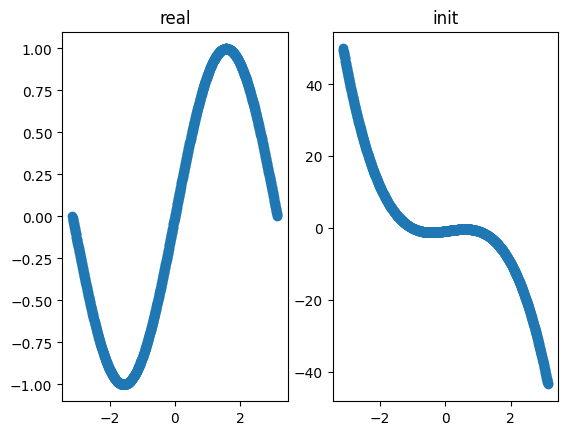

In [ ]:
import math, torch, matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# -pi ~ pi 1000
X = torch.linspace(-math.pi, math.pi, 1000).reshape(-1,1)
y = torch.sin(X)

# 각 계수의 초기화 값
a= torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
# 사인함수와 유사한 3차 다항식
y_random = a*X**3 + b*X**2 + c*X + d


plt.subplot(1,2,1)
plt.title('real')
plt.scatter(X,y)

plt.subplot(1,2,2)
plt.title('init')
plt.scatter(X,y_random)

plt.show()


풀어야할 다항식
$$z = ax^3 + bx^2 + cx + d
$$
손실함수
$$L = \sum (z - y)^2
$$
손실함수 L을 a에 대해서 미분, 연쇄법칙(chain rule)을 사용
$$\frac{\partial L}{\partial a} = \sum \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial a}
$$
각 항의 도함수(미분)을 계산
$$\frac{\partial L}{\partial a} = \sum 2(z - y) \cdot x^3
$$


# 토치를 이용한 경사하강법

In [ ]:
# 토치를 이용한 경사하강법
# 학습률
lr = 1e-6 #0.000001
X = torch.linspace(-math.pi, math.pi, 1000).reshape(-1,1)
y = torch.sin(X)
epochs = 2000
for epoch in range(epochs):
  z = a*X**3 + b*X**2 + c*X + d
  loss = ((z-y)**2).sum()
  if epoch % 100 == 0:
    print(f"epoch {epoch} loss {loss.item()}")
  # 손실함수의 미분값인 기울기를
  grad_y_pred = 2.0 * (z - y)
  grad_a = (grad_y_pred*X**3).sum()
  grad_b = (grad_y_pred*X**2).sum()
  grad_c = (grad_y_pred*X).sum()
  grad_d = (grad_y_pred).sum()

  a -= lr * grad_a
  b -= lr * grad_b
  c -= lr * grad_c
  d -= lr * grad_d

epoch 0 loss 306924.625
epoch 100 loss 470.1578674316406
epoch 200 loss 391.4306945800781
epoch 300 loss 326.3492736816406
epoch 400 loss 272.2811279296875
epoch 500 loss 227.35020446777344
epoch 600 loss 190.0023651123047
epoch 700 loss 158.94996643066406
epoch 800 loss 133.1248016357422
epoch 900 loss 111.6414794921875
epoch 1000 loss 93.76542663574219
epoch 1100 loss 78.88722229003906
epoch 1200 loss 66.50101470947266
epoch 1300 loss 56.18694305419922
epoch 1400 loss 47.596160888671875
epoch 1500 loss 40.43907165527344
epoch 1600 loss 34.47502517700195
epoch 1700 loss 29.50395965576172
epoch 1800 loss 25.35964012145996
epoch 1900 loss 21.903791427612305


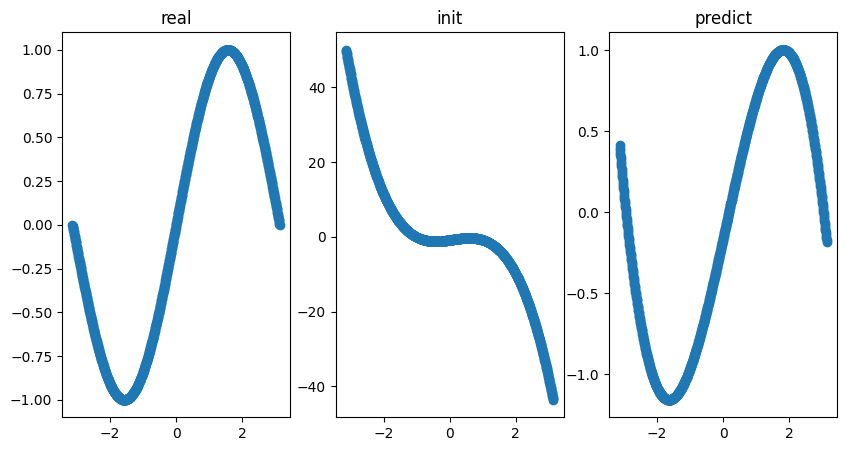

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('real')
plt.scatter(X,y)

plt.subplot(1,3,2)
plt.title('init')
plt.scatter(X,y_random)

plt.subplot(1,3,3)
plt.title('predict')
plt.scatter(X,z)

plt.show()

# 토치라이브러리를 이용한 사인함수 예측하기

In [ ]:
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import math, matplotlib.pyplot as plt

class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(-math.pi, math.pi, 1000).reshape(-1,1)
    self.y = torch.sin(self.X)
  def __len__(self):
    return len(self.X)
  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]
# 모델 정의
class PolyModel(nn.Module):
  # y = a*x**3 + b*x**2 +c*x + d
  def __init__(self):
    super().__init__()
    self.a = nn.Parameter(torch.rand(1))
    self.b = nn.Parameter(torch.rand(1))
    self.c = nn.Parameter(torch.rand(1))
    self.d = nn.Parameter(torch.rand(1))
  def forward(self, x):
    return self.a*x**3 + self.b*x**2 + self.c*x + self.d

def train(dataloader, model, criterion, optimizer,epochs):
  for epoch in range(epochs):
    epoch_loss = 0.0
    for idx, (X,y) in enumerate(dataloader):
      pred = model(X)
      loss = criterion(pred, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      epoch_loss += loss.item()
    if epoch % 100 == 0:
      print(f"epoch {epoch} loss {epoch_loss/len(dataloader)}")


# 데이터 셋, 로더
dataset = SinDataset()
dataloader = DataLoader(dataset, batch_size=100)
# 모델
model = PolyModel()
# 손실함수
criterion = nn.MSELoss()
# 옵티마이져
optimizer = optim.SGD(model.parameters())  # 1e-6   0.000001  --> 1e-3
# 학습
train(dataloader, model, criterion, optimizer, 3000)

epoch 0 loss 24.325033649802208
epoch 100 loss 0.024151426355820148
epoch 200 loss 0.007375124387908727
epoch 300 loss 0.005423978785984218
epoch 400 loss 0.005238908482715488
epoch 500 loss 0.0052423069602809845
epoch 600 loss 0.005253521481063217
epoch 700 loss 0.005259038752410561
epoch 800 loss 0.0052612617495469746
epoch 900 loss 0.005262098496314138
epoch 1000 loss 0.005262423830572516
epoch 1100 loss 0.005262531293556094
epoch 1200 loss 0.005262536951340735
epoch 1300 loss 0.005262580083217472
epoch 1400 loss 0.0052626039716415106
epoch 1500 loss 0.005262606567703188
epoch 1600 loss 0.0052626087446697055
epoch 1700 loss 0.005262610362842679
epoch 1800 loss 0.0052626127609983085
epoch 1900 loss 0.005262612970545888
epoch 2000 loss 0.005262612970545888
epoch 2100 loss 0.005262612970545888
epoch 2200 loss 0.005262612970545888
epoch 2300 loss 0.005262612970545888
epoch 2400 loss 0.005262612970545888
epoch 2500 loss 0.005262612970545888
epoch 2600 loss 0.005262612970545888
epoch 2700

In [ ]:
# 예측
model.eval()
with torch.no_grad():
  z2 = model(dataset.X)

In [ ]:
nn.Parameter(torch.rand(1))

Parameter containing:
tensor([0.1575], requires_grad=True)

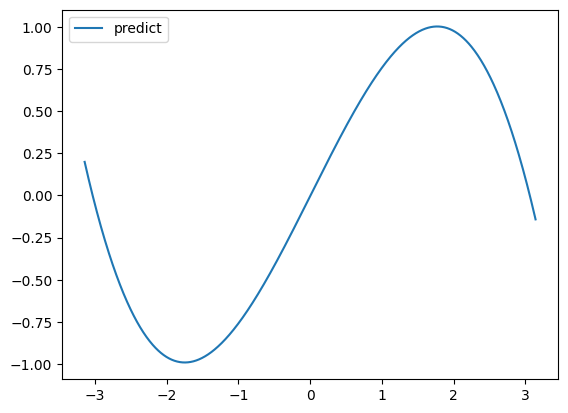

In [ ]:
# plt.plot(dataset.X, dataset.y, label='real')
plt.plot(dataset.X, z2, label='predict')
plt.legend()
plt.show()

파이토치를 이용한 보스턴 집값

In [ ]:
import kagglehub
from glob import glob
# Download latest version
path = kagglehub.dataset_download("schirmerchad/bostonhoustingmlnd")
print("Path to dataset files:", path)
filepaths = glob(path+'/**/*.*', recursive=True)
filepaths[0]

Path to dataset files: /root/.cache/kagglehub/datasets/schirmerchad/bostonhoustingmlnd/versions/1


'/root/.cache/kagglehub/datasets/schirmerchad/bostonhoustingmlnd/versions/1/housing.csv'

```
데이불러오기-모델정의-[손실계산-오차및역전파]*epocs-종료
```

In [ ]:
# 데이터셋 정의
# 로더를 통해 배치정의 섞고
# 모델을 통해 forward backward step
# 예측 model.eval()  torch.no_grade:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import torch,torch.nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
class BostonDataset(Dataset):
  def __init__(self, csv_file,train=True):
    self.train = train
    self.data = pd.read_csv(csv_file)
    self.data.dropna(inplace=True)
    self.X = self.data.iloc[:,:-1].to_numpy()
    self.y = self.data.iloc[:,-1].to_numpy()
    scaler = StandardScaler()
    self.X_train,self.X_test,self.y_train,self.y_test =  train_test_split(self.X, self.y, random_state=42, test_size=0.2)

    self.X_train = scaler.fit_transform(self.X_train)
    self.X_test = scaler.transform(self.X_test)
  def __len__(self):
    if self.train:
      return len(self.X_train)
    else:
      return len(self.X_test)
  def __getitem__(self, idx):
    if self.train:
      return torch.FloatTensor(self.X_train[idx]), torch.FloatTensor([self.y_train[idx]])
    else:
      return torch.FloatTensor(self.X_test[idx]), torch.FloatTensor([self.y_test[idx]])
# 검증
train_dataset = BostonDataset(filepaths[0])
test_dataset = BostonDataset(filepaths[0],train=False)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64)
data,label = next(iter(train_dataloader))
# 모델 정의
class BostonModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(3,64)
    self.linear2 = nn.Linear(64,32)
    self.linear3 = nn.Linear(32,1)
    self.relu = nn.ReLU()
    self.dropput = nn.Dropout(0.2)
  def forward(self, x):
    x = self.dropput( self.relu(self.linear1(x)))
    x = self.dropput(self.relu(self.linear2(x)))
    out = self.linear3(x)
    return out
print('lr=1e-3',1e-3)
#모델 생성
model = BostonModel()
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(),lr = 0.01)
epochs = 200
# train loop
from tqdm import tqdm
# tqdm_iter = tqdm(range(epochs))
for epoch in range(epochs):
  for data, label in train_dataloader:
    optim.zero_grad()  # 업데이트되 가중치가 계속 남이 있는 현상을 방지
    output = model(data) # 예측
    loss = criterion(output,label) # 손실 -- 미분계수가 계산
    loss.backward() # 역전판
    optim.step() # 업데이트
    # tqdm  출력
    # tqdm_iter.set_description(f"epoch {epoch} loss {loss.item()}")
  if epoch % 10 == 0:
    print(f"epoch {epoch} loss {loss.item()}")

lr=1e-3 0.001
epoch 0 loss 163157917696.0
epoch 10 loss 178898124800.0
epoch 20 loss 164331896832.0
epoch 30 loss 127815843840.0
epoch 40 loss 89554460672.0
epoch 50 loss 35512324096.0
epoch 60 loss 22564919296.0
epoch 70 loss 27897198592.0
epoch 80 loss 10911843328.0
epoch 90 loss 21883162624.0
epoch 100 loss 6274248704.0
epoch 110 loss 3350824448.0
epoch 120 loss 5043961344.0
epoch 130 loss 12850015232.0
epoch 140 loss 3286491648.0
epoch 150 loss 6705519616.0
epoch 160 loss 6623310848.0
epoch 170 loss 5932383232.0
epoch 180 loss 3653876224.0
epoch 190 loss 11697799168.0


In [ ]:
model.eval()
test_loss = 0.0
all_predics = []
all_labels = []
with torch.no_grad():
  for data, label in test_dataloader:
    data = data.to(device)
    label = label.to(device)
    output = model(data)
    test_loss += criterion(output, label).item()
    all_predics.extend(output.cpu().numpy())
    all_labels.extend(label.cpu().numpy())
  avg_loss = test_loss / len(test_dataloader)
  print(f"test loss {avg_loss}")

test loss 5899982848.0


In [ ]:
from sklearn.metrics import r2_score
r2_score(all_predics,all_labels)

0.626212156094775

# 정리
```
데이터 셋
데이터 로더
모델정의
손실함수 정의
함습루프
평가 with torch.no_grade():
```

In [ ]:
# iris 데이터(분류) 또는 타이타닉(회귀)
class IrisDataSet(Dataset):
  def __init__(self, csv_file, train=True):
    self.train = train
    self.data = pd.read_csv(csv_file)
    self.data.dropna(inplace=True)
    self.data.drop(columns=["Id"], inplace=True)
    self.X_train,self.X_test, self.y_train, self.y_test =  train_test_split(self.data, random_state=42, test_size=0.2)
  def __len__(self):
    if self.train:
      return len(self.X_train)
    else:
      return len(self.X_test)
  def __getitem__(self, idx):
    if self.train:
      return torch.FloatTensor(self.X_train[idx]), torch.LongTensor([self.y_train[idx]])
    else:
      return torch.FloatTensor(self.X_test[idx]), torch.LongTensor([self.y_test[idx]])

class IrisModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(4, 4)
    self.linear2 = nn.Linear(4, 3)
    self.relu = nn.ReLU()
  def forward(self, x):
    x = self.relu(self.linear1(x))
    out = self.linear2(x)
    return out

def train(dataloader, model, criterion, optimizer, epochs):
  for epoch in range(epochs):
    epoch_loss = 0.0
    for idx, (X, y) in enumerate(dataloader):
      pred = model(X)
      loss = criterion(pred, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      epoch_loss += loss.item()
    print(f"epoch {epoch} loss {epoch_loss/len(dataloader)}")

# 평가
def evaluate(dataloader, model, criterion):
  model.eval()
  with torch.no_grad():
    epoch_loss = 0.0
    for idx, (X, y) in enumerate(dataloader):
      pred = model(X)
      loss = criterion(pred, y)
      epoch_loss += loss.item()
    print(f"test loss {epoch_loss/len(dataloader)}")

model = IrisModel()
# 데이터 셋
# 데이터 로더
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
train(train_dataloader, model, criterion, optimizer, 100)
evaluate(test_dataloader, model, criterion)